In [ ]:
# This is a test to check that the rhs is correctly calculated for a (non trivial) BH spacetime

# restart the kernel to clear past work
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
# load the required python modules
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import time
import random
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# homemade code
sys.path.append('../')
from source.rhsevolution import *              # go here to look at how the evolution works
from source.mytests import *                   # go here to change the test conditions
from source.hamdiagnostic import *               # go here to change the  diagnostics

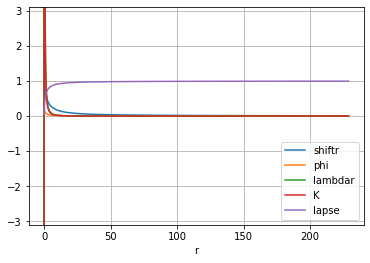

In [12]:
# Input parameters for grid and evolution here
N_r = 100 # num points on physical grid
R = 1.0 # Maximum outer radius, or sets dx_0 = R/N_r for logarithmic case

# Test the rhs values, use eddington finkelstein which has non trivial Kij and shift
r_is_logarithmic = True
r, initial_state = get_test_state_bh(R, N_r, r_is_logarithmic)

#unpackage the vector for readability
(u, v, phi, hrr, htt, hpp, K, arr, att, app, lambdar, shiftr, br, lapse) = unpack_state(initial_state, N_r)

#plot initial conditions
plt.xlabel('r')
plt.plot(r, shiftr, label='shiftr')
plt.plot(r, phi, label='phi')
#plt.plot(r, hrr, label='hrr')
#plt.plot(r, htt, label='htt')
plt.plot(r, lambdar, label='lambdar')
#plt.plot(r, arr, label='arr')
plt.plot(r, K, label='K')
plt.plot(r, lapse, label='lapse')
plt.ylim(-3.1,3.1)
#plt.xlim(0.0,5.0)
plt.legend(loc='best')
plt.grid()

khere = K


  0%|                                                   | 0/1000 [00:11<?, ?‰/s]

  0%|                                                   | 0/1000 [00:00<?, ?‰/s]

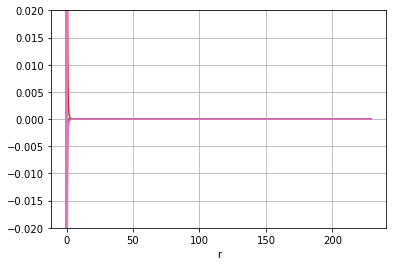

In [13]:
# calculate the rhs values and plot them
progress_bar = tqdm(total=1000, unit="‰")
eta = 1.0
solution = get_rhs(0.0, initial_state, R, N_r, r_is_logarithmic, eta, progress_bar, [0, 1])

#unpackage the vector for readability
(u, v, phi, hrr, htt, hpp, K, arr, att, app, lambdar, shiftr, br, lapse) = unpack_state(solution, N_r)

#plot rhs - all those for the metric components should be zero modulo boundary issues and the inner singularity
plt.xlabel('r')
plt.plot(r, phi, label='phi')
plt.plot(r, hrr, label='hrr')
plt.plot(r, htt, label='htt')
plt.plot(r, arr, label='arr')
plt.plot(r, att, label='att')
plt.plot(r, K, label='K')
plt.plot(r, lambdar, label='lambdar')
plt.ylim(-0.02,0.02)
#plt.xlim(0.15,0.9)
#plt.legend(loc='best')
plt.grid()